# Clase Práctica 3: Validación de modelos 📈

----------------------------------

Los modelos de regresión corresponden a un subcampo del aprendizaje supervisado que busca modelar la relación entre un cierto número de características y una variable objetivo continua. La calidad del modelo quedará determinada por la distancia entre el valor real y el predicho.

El clásico ejemplo es el modelo de regresión lineal, el cual es un algoritmo estadístico que busca establecer la recta que muestra la tendencia en un conjunto de datos. 

Estos modelos pueden ser aplicados a cualquier problema que busque predecir un número real. Por ejemplo, predecir el precio de una casa, el costo de un tratamiento, el número de días en que un paciente será dado de alta, entre muchas más tareas.






## Objetivos de la clase 📚

Los objetivos principales de esta clase son los siguientes:



1.   Explorar varios modelos de regresión, especialmente modelos de arboles de decisión
2.   Explorar varias métricas.
3.   Determinar los modelos que mejor se adaptan al problema.


Específicamente, utilizaremos un conjunto de datos que contiene valores de seguros de salud según características del paciente.

**Lectura del dataset**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fvillena/biocompu/2022/data/insurance.csv')

Entonces, lo que haremos será analizar este dataset que está dedicado al costo de tratamiento de diversos pacientes. Si bien el costo de tratamiento depende de muchos factores médicos, existen otras variables que sería interesante explorar como la edad, sexo, ubicación, entre otras.

Seleccionamos 3 filas al azar para ver de qué se tratan los datos

In [3]:
df.sample(3)

,age,sex,bmi,children,smoker,region,charges
842,23,female,32.78,2,yes,southeast,36021.0112
1122,53,female,36.86,3,yes,northwest,46661.4424
514,39,male,28.30,1,yes,southwest,21082.1600


Vemos los nombres de las columnas y los tipos de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Veamos si existen valores nulos


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Lo siguiente que haremos será analizar cuáles son las variables que están más correlacionadas con el costo del tratamiento. Pero antes, hablemos un poco sobre las variables categóricas. Estas variables contienen un número finito de posibilidades, y pueden ser tanto strings como números. Como vimos en la clase anterior, si es que tenemos variables de tipo strings, debemos realizar una transformación.

In [6]:
df.sample(1)

,age,sex,bmi,children,smoker,region,charges
483,51,female,39.5,1,no,southwest,9880.068


Del resultado anterior vemos que las variables categoricas serían sexo, fumador y región. Para poder transformarlas podemos utilizar la clase LabelEncoder.

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
# Transformamos la variable sexo
df.age

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [9]:
le = LabelEncoder()

print(df.sex.drop_duplicates())
le.fit(df.sex.drop_duplicates()) 
df.sex[0]

0    female
1      male
Name: sex, dtype: object


'female'

In [10]:
df.sex = le.transform(df.sex)

In [11]:
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
df.smoker

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [12]:
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)
df.region

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int64

Entonces, básicamente lo que hace esta clase es transformar cada valor de la columna en un valor numérico mediante un mapeo. En el caso de sexo, sabemos que los valores posible son *Male* y *Female*, por lo tanto, le asignamos un 0 al primer valor y un 1 al segundo. Aquí también pueden utilizar la función get_dummies vista en la clase anterior, pero siempre está el riesgo de aumentar considerablemente la cantidad de features. Ahora veamos como está la correlación de los datos.

In [13]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

A priori podemos ver que la variable más relacionada con el costo del tratamiento es si el paciente es fumador o no, mientras que la que menos se relaciona es la región. 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Axes: >

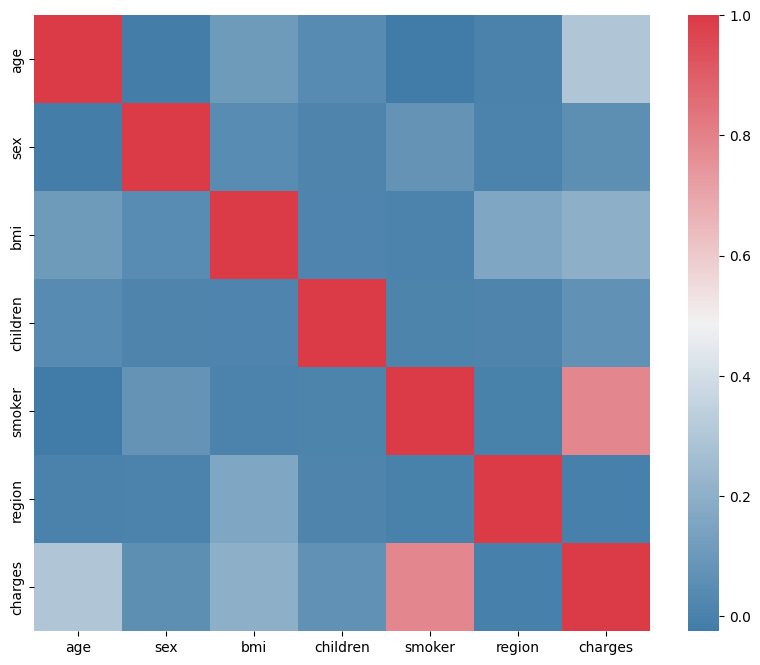

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

Si seguimos analizando la variable smoker, en el siguiente gráfico podemos ver la distribución de costos de las personas fumadoras versus los no fumadores.

/tmp/ipykernel_55660/1912537470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
/tmp/ipykernel_55660/1912537470.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

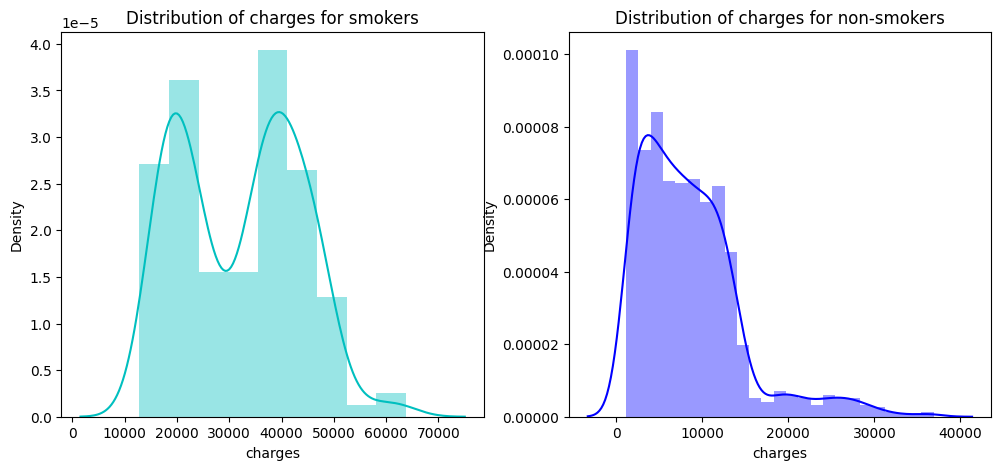

In [16]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Si bien el costo del tratamiento de los fumadores es mucho más elevados, es importante ver la distribución de frecuencias de estos datos.

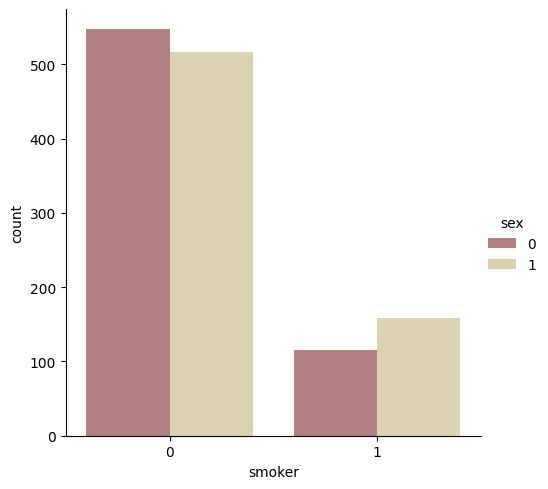

In [17]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)

Veamos un box plot a ver si encontramos algo más interesante acerca de los fumadores versus no fumadores.

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

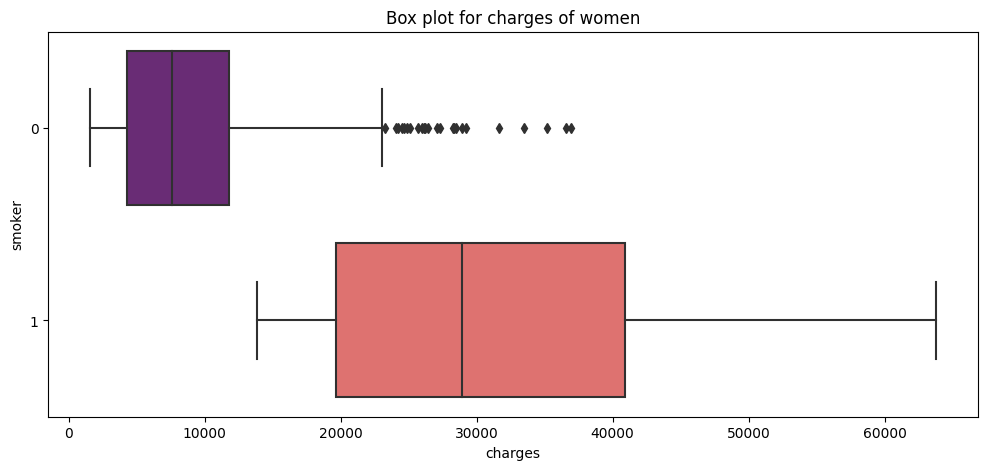

In [18]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'magma')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

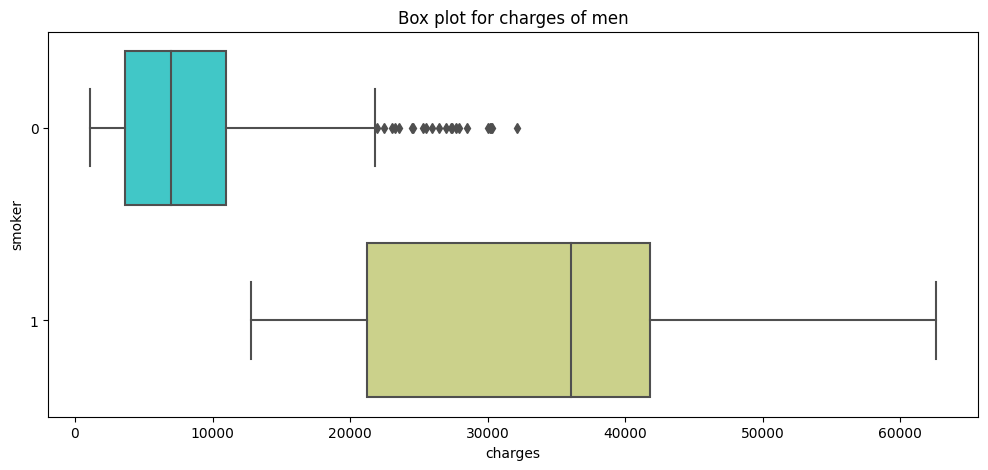

In [19]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'rainbow')

Y si queremos ver el costo de tratamiento en personas de 18 años según si fuman o no?

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

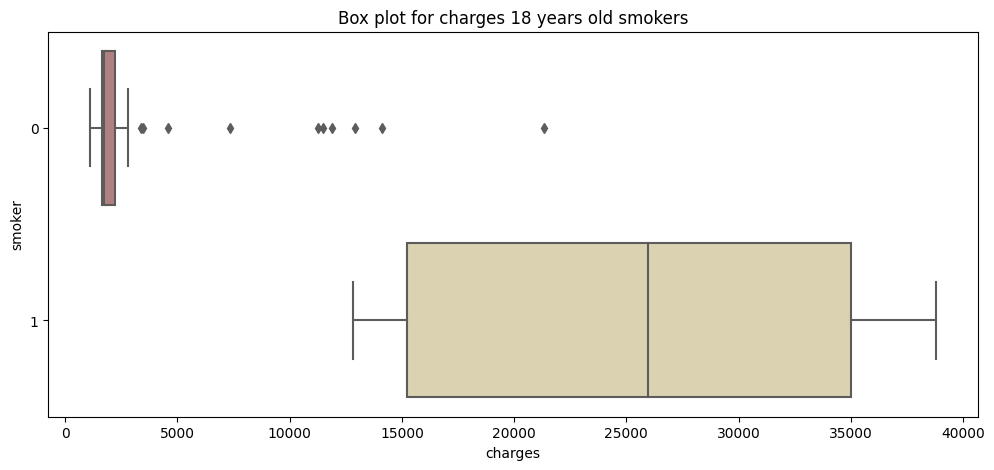

In [20]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

Interesante, de todas maneras el objetivo de este práctico no es la visualización y análisis así que pasemos a la parte de los modelos.

# **Selección de modelos**

Siguiendo la receta de la primera clase, lo primero que hacemos es dividir nuestro conjunto de datos original en las particiones X e y, donde X corresponde a las características que serán pasadas al modelo, mientras que y es la variable objetivo.

In [21]:
X = df.drop(['charges'], axis = 1)
y = df.charges

Luego, para poder medir bien el nivel de generalización del modelo, dividimos el conjunto de datos en entrenamiento y testing.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

**Regresión Lineal**

Esta es una de las técnicas de regresión más utilizadas en aprendizaje de máquinas. Como se vió en clases, la idea general de este algoritmo en encontrar al recta que mejor se ajusta a un conjunto de datos continuos.

En el caso más simple, cuando queremos describir una variable dependiente `y` según una variable independiente `x`, el problema se reduce a la siguiente ecuación:

$$y = wx + b$$

En el caso general tendremos un conjunto de n variables independientes (features) y 1 variable dependiente, de manera que la ecuación quedará definida como:

$$y = w_{0}x_{0} + w_{1}x_{1} + ... +. w_{n}x_{n} + b$$

El proceso de aprendizaje consiste en encontrar qué conjunto de parámetros $w_{0}, .... , w_{n}$ minimiza el error cuadrático medio entre los valores predichos y los reales.


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression().fit(X_train, y_train)

Luego de entrenar nuestro modelo podemos ver cuáles de los coeficientes son los que más pesan.

In [26]:
lr_vil = pd.DataFrame(lr.coef_,columns=["value"]) # Guardamos en un dataframe los coeficientes
lr_vil.index = df.columns[:-1]
lr_vil

,value
age,258.010521
sex,-89.425006
bmi,343.819658
children,479.316687
smoker,23703.748336
region,-388.434172


In [27]:
y_pred = lr.predict(X_test)

Lo siguiente que debemos hacer es definir cuáles son las métricas que utilizaremos para medir nuestro modelo. En este caso usaremos el error absoluto medio, la raíz del error cuadrático medio, y el coeficiente de determinación, que se definen con las siguientes fórmulas.

$MAE = \frac{1}{m}\sum_{i=1}^{m}|y_{true}-y_{pred}|$

$RSME = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(y_{true}-y_{pred})^2}$

$R^2 = 1 - \frac{\frac{1}{m}\sum_{i=1}^{m}(y_{true}-y_{pred})^2}{\frac{1}{m}\sum_{i=1}^{m}(y_{true}-y_{mean})^2}$

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
 
def compute_metrics(y_true, y_pred):
    """
    Esta función recibe un arreglo de valores reales y predichos para 
    retornar un diccionario con una serie de métricas de regresión
    """
    return {
        'mae': mean_absolute_error(y_true, y_pred),
        'rmse': mean_squared_error(y_true, y_pred) ** 0.5,
        'r2': r2_score(y_true, y_pred)
    }

In [29]:
lr_regression_report = compute_metrics(y_test, y_pred)

In [30]:
lr_regression_report

{'mae': 4199.3349698042575,
 'rmse': 5823.565476334052,
 'r2': 0.7626072475418817}

### Métodos basados en árboles

Los métodos basados en árboles de decisión son algoritmos de aprendizaje supervisado que se utilizan tanto para problemas de clasificación como de regresión. Estos algoritmos construyen un árbol de decisión a partir del conjunto de datos de entrenamiento, donde cada nodo representa una característica del conjunto de datos y cada rama representa una decisión basada en esa característica. A continuación, se presenta un resumen de los métodos basados en árboles de decisión más comunes:

* Árbol de Decisión Clásico: Es la forma básica de un árbol de decisión, donde cada nodo interno representa una característica del conjunto de datos y cada hoja representa una etiqueta de clasificación o un valor de regresión.

* Random Forest (Bosque Aleatorio): Es un método de conjunto que construye múltiples árboles de decisión y combina sus predicciones para obtener un resultado más robusto y generalizado. Cada árbol se entrena con una muestra aleatoria con reemplazo del conjunto de entrenamiento y también utiliza un subconjunto aleatorio de las características.

* Gradient Boosting: Es otro método de conjunto que también construye múltiples árboles de decisión, pero a diferencia de Random Forest, los árboles se construyen secuencialmente y cada árbol se enfoca en corregir los errores del anterior. Es una técnica potente que puede mejorar el rendimiento de los árboles de decisión, pero también puede ser más propensa a sobreajustar.

* XGBoost (Extreme Gradient Boosting): Es una implementación mejorada y optimizada de Gradient Boosting que utiliza técnicas como la regularización y la poda de árboles para mejorar la generalización y el rendimiento del modelo. Es ampliamente utilizado en competiciones de ciencia de datos debido a su eficiencia y precisión.

* LightGBM (Light Gradient Boosting Machine): Es otra implementación de Gradient Boosting que se destaca por su alta eficiencia y velocidad de entrenamiento. Utiliza el algoritmo de separación de hojas por el gradiente (GOSS) y el algoritmo de crecimiento de hojas por el gradiente (EFB) para reducir el costo computacional del entrenamiento.

* CatBoost: Es otra implementación de Gradient Boosting que se destaca por su capacidad para manejar automáticamente variables categóricas sin la necesidad de codificación previa. También utiliza técnicas como la regularización y la detección temprana de sobreajuste para mejorar el rendimiento del modelo.

**Random Forest Regressor**

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
y_pred = rf.predict(X_test)

In [34]:
rf_vil = pd.DataFrame(list(zip(df.columns[:-1],rf.feature_importances_)),
             columns=["feature","importance"]
            ).set_index("feature")
rf_vil.sort_values("importance",ascending=False)

,importance
feature,
smoker,0.615826
bmi,0.207543
age,0.132888
children,0.022914
region,0.015340
sex,0.005490


In [35]:
rf_regression_report = compute_metrics(y_test, y_pred)
rf_regression_report

{'mae': 2710.483835091168, 'rmse': 4574.624146225354, 'r2': 0.8535125677623207}

In [46]:
performances = pd.DataFrame( # Consolidamos todas las métricas en un DatFrame
    data = [
        lr_regression_report,
        knn_regression_report,
        rf_regression_report,
        svr_regression_report
    ],
    index = [
        "Linear Regression",
        "k-Nearest Neighbors",
        "Random Forest",
        "SVR"
    ]
).sort_values( # Ordenamos los valores
    by="rmse"
)
performances

,mae,rmse,r2
Random Forest,2707.284530,4573.299176,0.853597
Linear Regression,4199.334970,5823.565476,0.762607
k-Nearest Neighbors,8263.658316,11548.389436,0.066461
SVR,6590.561184,12997.549505,-0.182531


In [47]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 12.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: pip install --upgrade pip


In [48]:
from catboost import CatBoostRegressor

In [49]:
cb = CatBoostRegressor(learning_rate =0.01, max_depth =5, verbose = 0)

cb.fit(X_train, y_train)

In [50]:
y_pred = cb.predict(X_test)

In [51]:
compute_metrics(y_test, y_pred)

{'mae': 2432.052809251143, 'rmse': 4183.1289453403, 'r2': 0.8775124256433858}